# 图像特效-伪彩色

In [5]:
#coding:utf-8
%matplotlib  inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
src = cv2.cvtColor(cv2.imread('../datas/f3.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f2.jpg',0)

In [15]:
def psudo_color(src):
    srci = src
    if len(src.shape) < 3:
        srci = cv2.cvtColor(src,cv2.COLOR_GRAY2RGB)
    srci = srci.astype(np.int32)
    dst = np.zeros_like(srci)
    r = srci[:,:,0]
    g = srci[:,:,1]
    b = srci[:,:,2]
    dr = dst[:,:,0]
    dg = dst[:,:,1]
    db = dst[:,:,2]
    
    idx = (r <= 127)
    dr[idx] = 0
    idx = (r >= 128) & (r <= 191)
    dr[idx] = 4 * r[idx] - 511
    idx = ( r >= 192) & (r <= 255)
    dr[idx] = 255
    
    idx = (g <= 63)
    dg[idx] = 4 * g[idx]
    idx = (g >= 64) & (g <= 191)
    dg[idx] = 255
    idx = (g >= 192) & ( g <= 255)
    dg[idx] = 1023 - 4 * g[idx]
    
    idx = (b <= 63)
    db[idx] = 255
    idx = (b >= 64) & (b <= 127)
    db[idx] = 511 - 4 * b[idx]
    idx = (b >=128) & (b <= 255)
    db[idx] = 0
    
    return cv2.convertScaleAbs(dst)

Text(0.5,1,'Psudo Color')

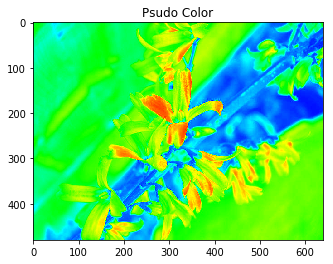

In [16]:
dst = psudo_color(gray)
plt.imshow(dst)
plt.title('Psudo Color')